## IRIS DATASET

In [ ]:
Goal:
The dataset deals with the various properties of the flowers and then classifies them according to their properties.
It involves predicting the flower species given measurements of iris flowers.

It is a multi-class classification problem. The number of observations for each class is balanced. 
There are 150 observations with 4 input variables and 1 output variable. The variable names are as follows:

Sepal length in cm.
Sepal width in cm.
Petal length in cm.
Petal width in cm.
Species (Iris Setosa, Iris Versicolour, Iris Virginica).

In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
import warnings
warnings.filterwarnings('ignore')

In [78]:
iris = pd.read_csv("iris.csv")

In [79]:
iris.sample(5) # show random 5 records

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
130  131            7.4           2.8            6.1           1.9   
135  136            7.7           3.0            6.1           2.3   
42    43            4.4           3.2            1.3           0.2   
109  110            7.2           3.6            6.1           2.5   
15    16            5.7           4.4            1.5           0.4   

            Species  
130  Iris-virginica  
135  Iris-virginica  
42      Iris-setosa  
109  Iris-virginica  
15      Iris-setosa

In [80]:
iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [45]:
#dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe
iris.drop('Id',axis=1,inplace=True)   


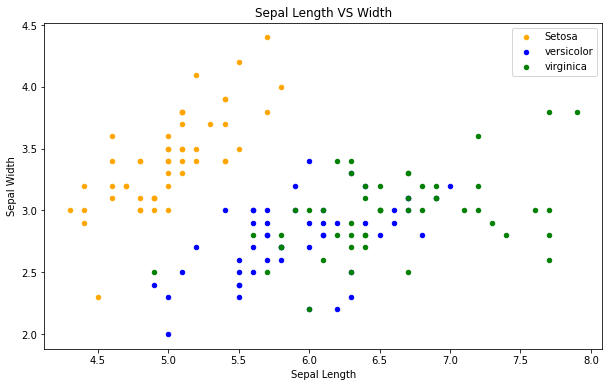

In [46]:
#GCF stands for Get Current Figure plt.gcf () allows you to get a reference to the current figure when using pyplot.
#Example: change image sizes using fig.set_size_inches ()

fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

#### The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

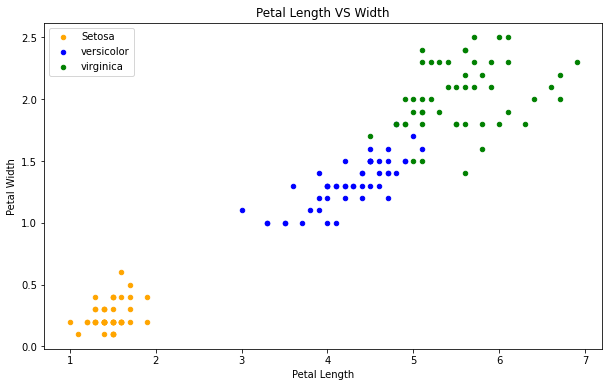

In [47]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

#### As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

#### Now let us see how are the length and width are distributed

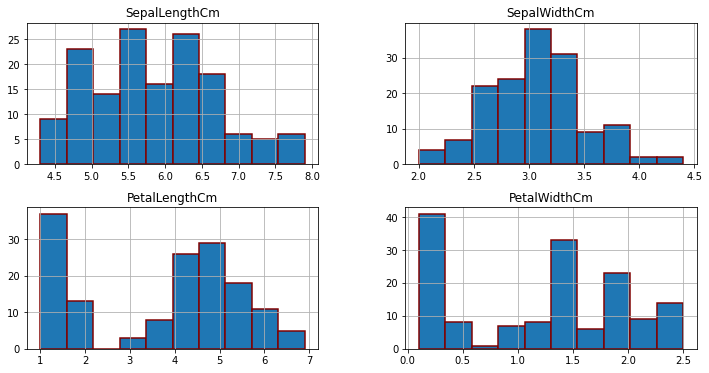

In [48]:
iris.hist(edgecolor='maroon', linewidth=1.5)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

#### Now let us see how the length and width vary according to the species

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

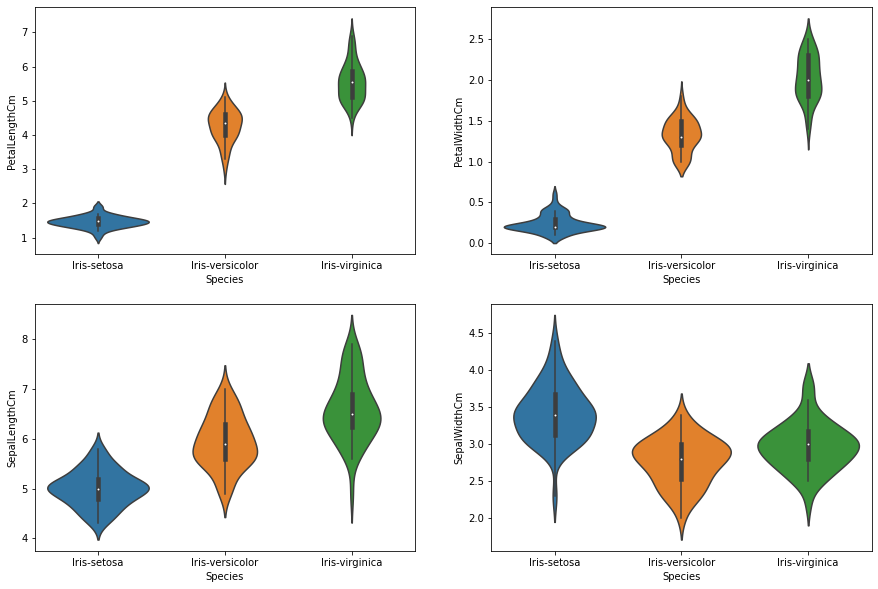

In [49]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

#### The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

#### Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.
Classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data.

#### Attributes-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.

Target variable, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

In [50]:
iris.shape #get the shape of the dataset

(150, 5)

#### Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

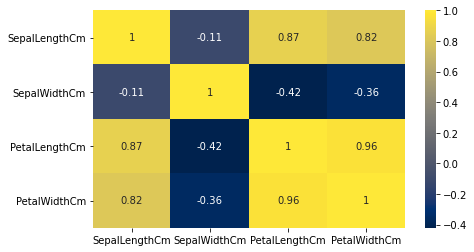

In [51]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cividis') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

### Observation--->

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

### Steps To Be followed When Applying an Algorithm
    #Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
    #Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
    #Then pass the training dataset to the algorithm to train it. We use the .fit() method
    #Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
    #We then check the accuracy by passing the predicted outcome and the actual output to the model.

### Splitting The Data into Training And Testing Dataset

In [52]:
train, test = train_test_split(iris, test_size = 0.3,random_state=2)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [53]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [54]:
train_X.head(2)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
134            6.1           2.6            5.6           1.4
28             5.2           3.4            1.4           0.2

In [55]:
test_X.head(2)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
6            4.6           3.4            1.4           0.3
3            4.6           3.1            1.5           0.2

In [56]:
train_y.head()  ##output of the training data

134     Iris-virginica
28         Iris-setosa
65     Iris-versicolor
0          Iris-setosa
27         Iris-setosa
Name: Species, dtype: object

### MODEL BUILDING,FITTING,PREDICTION AND CHECKING ACCURACY

### Support Vector Machine (SVM)

In [57]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9777777777777777


### Logistic Regression

In [58]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9777777777777777


### Decision Tree

In [59]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9555555555555556


#### Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(train_X,train_y)
print('Training data accuracy {:.2f}'.format(random_forest.score(train_X,train_y)*100))
print('Testing data accuracy {:.2f}'.format(random_forest.score(test_X,test_y)*100))

Training data accuracy 100.00
Testing data accuracy 97.78


### K-Nearest Neighbours

In [60]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 1.0


#### Let's check the accuracy for various values of n for K-Nearest nerighbours

([<matplotlib.axis.XTick at 0x1fa1ad183d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

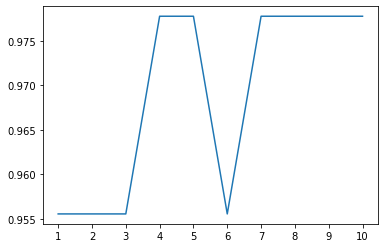

In [25]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

### We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

### Creating Petals And Sepals Training Data

In [61]:
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

In [62]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species

In [63]:
train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

### SVM

In [64]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


### Logistic Regression

In [65]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


### Decision Tree

In [67]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


### Random Tree Classifer

In [84]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(train_x_p,train_y_p)
print('Random Forest PetalTraining data accuracy {:.2f}'.format(random_forest.score(train_x_p,train_y_p)*100))
print('Random Forest PetalTesting data accuracy {:.2f}'.format(random_forest.score(test_x_p,test_y_p)*100))

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(train_x_s,train_y_s)
print('Random Forest Sepal Training data accuracy {:.2f}'.format(random_forest.score(train_x_s,train_y_s)*100))
print('Random Forest Sepal Testing data accuracy {:.2f}'.format(random_forest.score(test_x_s,test_y_s)*100))

Random Forest PetalTraining data accuracy 99.05
Random Forest PetalTesting data accuracy 97.78
Random Forest Sepal Training data accuracy 94.29
Random Forest Sepal Testing data accuracy 62.22


### K-Nearest Neighbours

In [68]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


### Observations:
    #Using Petals over Sepal for training the data gives a much better accuracy.
    #This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low      whereas the correlation between Petal Width and Length was very high.

In [ ]:
Source code :https://www.kaggle.com/ash316/ml-from-scratch-with-iris